## Exploratory Data Analysis

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  
from data_ingestion import DataIngestion   

In [2]:
def load_data():  
    
    training_path = r"E:\Hackathon\Credit Card Default Risk\dataset\train.csv" 
    testing_path  = r"E:\Hackathon\Credit Card Default Risk\dataset\test.csv" 
    sample_file_path = r"E:\Hackathon\Credit Card Default Risk\dataset\sample_submission.csv" 
    
    data_ingest = DataIngestion(training_path, testing_path, sample_file_path) 
    training_data, testing_data = data_ingest.get_data() 
    
    return training_data, testing_data 

train_data, test_data = load_data()

In [3]:
train_data.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


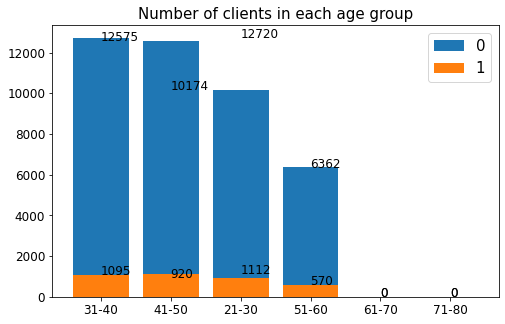

In [8]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
train_data['age'] = pd.cut(x=train_data.age, bins=bins, labels=names, right=True)

age_cnt = train_data.age.value_counts()
age_0 = (train_data.age[train_data['credit_card_default'] == 0].value_counts())
age_1 = (train_data.age[train_data['credit_card_default'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

# clients ranging from 21 - 30 are the one who are not likely to pay! and then age group og 31-40 and hence Age is important factor to consider!


In [19]:
import plotly.express as px

num_pos = len(train_data["credit_card_default"]==1) 
num_neg = len(train_data["credit_card_default"]==0) 

arr_of_numbers1 = [num_pos, num_neg]
labels1 = ["Risk", "No Risk"] 

fig2 = px.pie(labels, values=arr_of_numbers1, names = labels1)  

fig2.update_traces(title = 'Proportion of Risk & No Risk',
                   title_font = dict(size=25,family='Verdana', 
                                     color='darkred'),
                   hoverinfo='label+percent',
                   textinfo='percent', textfont_size=20)

fig2.show()

In [18]:
import plotly.express as px

number_of_females = len(train_data["credit_card_default"][train_data.gender == "F"][train_data.credit_card_default == 1]) 
number_of_males = len(train_data["credit_card_default"][train_data.gender == "M"][train_data.credit_card_default == 1]) 

arr_of_numbers = [number_of_females, number_of_males]
labels = ["Females", "Males"] 

fig = px.pie(labels, values=arr_of_numbers, names = labels)  

fig.update_traces(title = 'Proportion of Male & Female for Credit Card risk',
                   title_font = dict(size=25,family='Verdana', 
                                     color='darkred'),
                   hoverinfo='label+percent',
                   textinfo='percent', textfont_size=20)

fig.show()

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



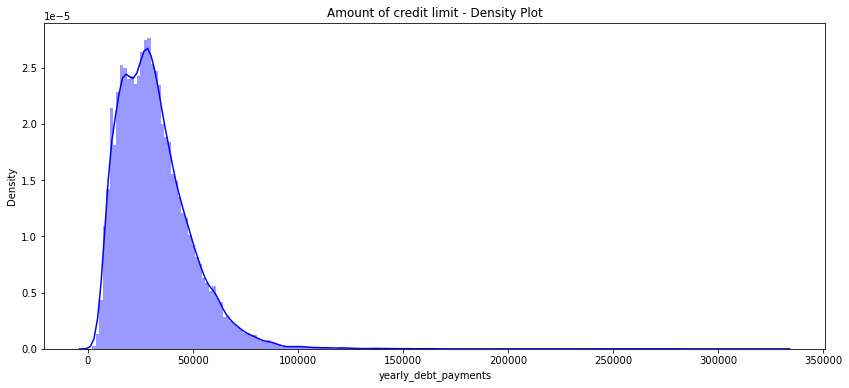

In [33]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(train_data['yearly_debt_payments'],kde=True,bins=200, color="blue")
plt.show()


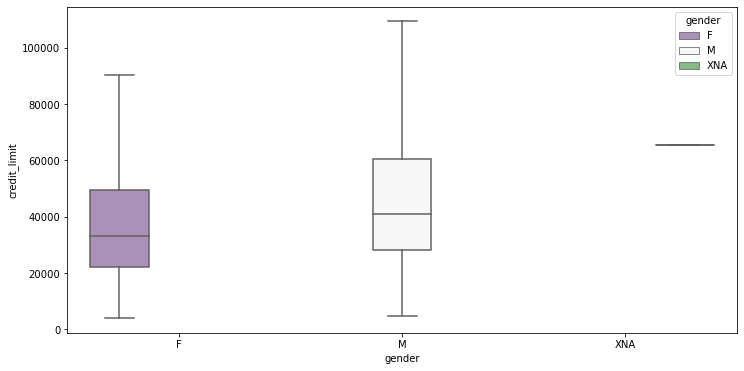

In [47]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="gender", y="credit_limit", hue="gender",data=train_data, palette="PRGn",showfliers=False)
plt.show();

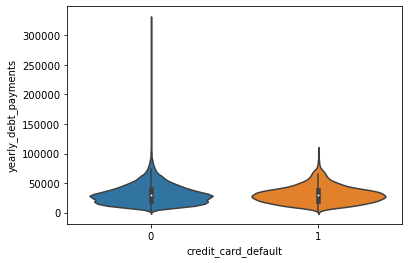

In [50]:
sns.violinplot(x="credit_card_default", y="yearly_debt_payments", data=train_data, size=8)
plt.show()

In [57]:
child0 = len(train_data["credit_card_default"][train_data.no_of_children == 0][train_data.credit_card_default == 1])  
child1 = len(train_data["credit_card_default"][train_data.no_of_children == 1][train_data.credit_card_default == 1])  
child2 = len(train_data["credit_card_default"][train_data.no_of_children == 2][train_data.credit_card_default == 1])  
child3 = len(train_data["credit_card_default"][train_data.no_of_children == 3][train_data.credit_card_default == 1])  
child4 = len(train_data["credit_card_default"][train_data.no_of_children == 4][train_data.credit_card_default == 1])  
child5 = len(train_data["credit_card_default"][train_data.no_of_children == 5][train_data.credit_card_default == 1])  
child6 = len(train_data["credit_card_default"][train_data.no_of_children == 6][train_data.credit_card_default == 1])  
child7 = len(train_data["credit_card_default"][train_data.no_of_children == 7][train_data.credit_card_default == 1])  
child8 = len(train_data["credit_card_default"][train_data.no_of_children == 8][train_data.credit_card_default == 1])  
child9 = len(train_data["credit_card_default"][train_data.no_of_children == 9][train_data.credit_card_default == 1])  

arr = [child0, child1, child2, child3, child4, child5, child6, child7, child8, child9]
labels=[0,1,2,3,4,5,6,7,8,9] 

fig = px.pie(labels, values=arr, names = labels)  
fig.show()